In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
ORG_NAME = "Index Coop"
SPLITS_FREQ = "W-THU"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2023-07-13"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2020-11-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071087
2020-11-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070025
2020-12-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067894
2020-12-10,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.122292
2020-12-17,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.121842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-15,0.666667,0.277778,0.333333,0.166667,0.111111,0.016667,0.666667,0.617320,0.721226,0.695109,...,0.745833,0.745833,0.745833,0.781250,0.665000,0.795000,0.795000,0.795000,0.795000,0.123280
2023-06-22,0.428571,0.142857,0.085714,0.042857,0.028571,0.004286,0.428571,0.318042,0.318042,0.318042,...,0.285714,0.285714,0.285714,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.121934
2023-06-29,0.000000,0.000000,0.057143,0.028571,0.019048,0.002857,0.000000,0.000000,0.110529,0.110529,...,0.285714,0.285714,0.285714,0.000000,0.000000,NaN,NaN,NaN,NaN,0.109754


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2020-11-19,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.072532
2020-11-26,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.072486
2020-12-03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.071339
2020-12-10,1.0,0.333333,0.200000,0.100000,0.066667,0.010000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.000000,1.000000,1.00000,1.0,1.0,1.0,0.124748
2020-12-17,1.0,0.333333,0.200000,0.100000,0.066667,0.010000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.000000,1.000000,1.00000,1.0,1.0,1.0,0.128058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-15,1.0,0.611111,0.500000,0.300000,0.200000,0.030000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.637500,0.829167,0.93750,1.0,1.0,1.0,0.127035
2023-06-22,1.0,0.428571,0.257143,0.128571,0.085714,0.012857,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.857143,1.000000,1.00000,1.0,1.0,1.0,0.126123
2023-06-29,1.0,0.380952,0.228571,0.114286,0.076190,0.011429,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.928571,1.000000,1.00000,1.0,1.0,1.0,0.125242


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2020-11-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071087,openpop
2020-11-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070025,openpop
2020-12-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067894,openpop
2020-12-10,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.122292,openpop
2020-12-17,1.000000,0.333333,0.200000,0.100000,0.066667,0.010000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.121842,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-15,0.666667,0.277778,0.333333,0.166667,0.111111,0.016667,0.666667,0.617320,0.721226,0.695109,...,0.745833,0.745833,0.781250,0.665000,0.795000,0.795000,0.795000,0.795000,0.123280,openpop
2023-06-22,0.428571,0.142857,0.085714,0.042857,0.028571,0.004286,0.428571,0.318042,0.318042,0.318042,...,0.285714,0.285714,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.121934,openpop
2023-06-29,0.000000,0.000000,0.057143,0.028571,0.019048,0.002857,0.000000,0.000000,0.110529,0.110529,...,0.285714,0.285714,0.000000,0.000000,NaN,NaN,NaN,NaN,0.109754,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2023-05-18,1.0,7d,2023-05-18,0.001066,0.008088,16.0,8.0,12.500000,0.166667,0.166667,...,0.500000,0.625000,0.625000,0.625000,0.625000,0.625000,0.127826,itemknn,test,NaN
2023-05-25,1.0,7d,2023-05-25,0.001093,0.006569,4.0,3.0,3.800000,0.200000,0.266667,...,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.127051,itemknn,test,NaN
2023-06-01,6.0,7d,2023-06-01,0.005961,0.005227,3.0,3.0,3.000000,0.750000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.125015,itemknn,test,NaN
2023-06-08,6.0,14d,2023-06-08,0.001209,0.005608,2.0,2.0,2.000000,0.250000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.121802,itemknn,test,NaN
2023-06-15,3.0,21d,2023-06-15,0.003908,0.006340,5.0,5.0,5.000000,0.000000,0.250000,...,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.118614,itemknn,test,NaN
2023-06-22,9.0,10YE,2023-06-22,0.663973,0.049529,1.0,1.0,1.000000,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.116521,itemknn,test,NaN
2023-06-29,9.0,90d,2023-06-29,0.010918,0.008657,8.0,5.0,6.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.108739,itemknn,test,NaN
2023-07-06,2.0,60d,2023-07-06,0.004225,0.016285,4.0,3.0,3.888889,0.666667,0.703704,...,0.444444,0.750000,0.812500,0.812500,0.812500,0.812500,0.122927,itemknn,test,NaN
2023-07-13,6.0,7d,2023-07-13,0.005923,0.004241,7.0,6.0,6.333333,0.666667,0.444444,...,0.571429,0.714286,0.857143,1.000000,1.000000,1.000000,0.126474,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2023-05-18,1.0,7d,2023-05-18,0.001066,0.008088,16.0,8.0,12.500000,0.166667,0.166667,...,0.500000,0.625000,0.625000,0.625000,0.625000,0.625000,0.127826,itemknn,test,NaN
2023-05-25,1.0,7d,2023-05-25,0.001093,0.006569,4.0,3.0,3.800000,0.200000,0.266667,...,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.127051,itemknn,test,NaN
2023-06-01,6.0,7d,2023-06-01,0.005961,0.005227,3.0,3.0,3.000000,0.750000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.125015,itemknn,test,NaN
2023-06-08,6.0,14d,2023-06-08,0.001209,0.005608,2.0,2.0,2.000000,0.250000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.121802,itemknn,test,NaN
2023-06-15,3.0,21d,2023-06-15,0.003908,0.006340,5.0,5.0,5.000000,0.000000,0.250000,...,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.118614,itemknn,test,NaN
2023-06-22,9.0,10YE,2023-06-22,0.663973,0.049529,1.0,1.0,1.000000,1.000000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.116521,itemknn,test,NaN
2023-06-29,9.0,90d,2023-06-29,0.010918,0.008657,8.0,5.0,6.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.108739,itemknn,test,NaN
2023-07-06,2.0,60d,2023-07-06,0.004225,0.016285,4.0,3.0,3.888889,0.666667,0.703704,...,0.444444,0.750000,0.812500,0.812500,0.812500,0.812500,0.122927,itemknn,test,NaN
2023-07-13,6.0,7d,2023-07-13,0.005923,0.004241,7.0,6.0,6.333333,0.666667,0.444444,...,0.571429,0.714286,0.857143,1.000000,1.000000,1.000000,0.126474,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

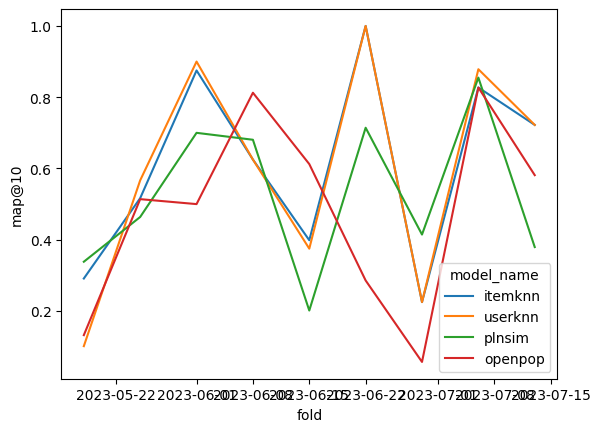

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2023-05-11,1,7d,2023-05-11,0.001847,0.011309,10,5,7.000000,0.250000,0.333333,0.425000,0.325000,...,1.000,1.0,1.0,0.375000,0.395238,0.569048,0.626190,0.626190,0.626190,0.129517
2023-05-18,1,7d,2023-05-18,0.001066,0.008088,16,8,12.500000,0.166667,0.166667,0.166667,0.133333,...,0.625,1.0,1.0,0.500000,0.625000,0.625000,0.625000,0.625000,0.625000,0.127826
2023-05-25,6,7d,2023-05-25,0.001489,0.006588,4,3,3.800000,0.200000,0.266667,0.280000,0.140000,...,1.000,1.0,1.0,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.126045
2023-06-01,6,14d,2023-06-01,0.001128,0.006961,3,3,3.000000,0.800000,0.333333,0.200000,0.100000,...,1.000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.124401
2023-06-08,3,21d,2023-06-08,0.001979,0.006320,2,2,2.000000,0.250000,0.333333,0.200000,0.100000,...,1.000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.122111
2023-06-15,9,10YE,2023-06-15,0.660049,0.051481,5,5,5.000000,0.333333,0.277778,0.333333,0.166667,...,1.000,1.0,1.0,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.124141
2023-06-22,9,90d,2023-06-22,0.012838,0.011732,1,1,1.000000,1.000000,0.333333,0.200000,0.100000,...,1.000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.116689
2023-06-29,2,60d,2023-06-29,0.004759,0.005878,8,5,6.000000,0.500000,0.166667,0.200000,0.100000,...,1.000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.123197
2023-07-06,6,7d,2023-07-06,0.001467,0.008711,4,3,3.857143,0.857143,0.761905,0.571429,0.285714,...,1.000,1.0,1.0,0.444444,0.761905,0.833333,0.833333,0.833333,0.833333,0.124894
